In [1]:
import json
import os

# Define the base directory for the problem files
problem_dir = "math-rollouts/deepseek-r1-distill-llama-8b/temperature_0.6_top_p_0.95/correct_base_solution/problem_330"

# The directory containing the solution file
chunk_dir = "chunk_0"
# The name of the solution file
chunk_filename = "solutions.json"

# Construct the full path to the solutions.json file
chunk_path = os.path.join(problem_dir, chunk_dir, chunk_filename)

try:
    with open(chunk_path, 'r') as f:
        # Load the JSON content from the file
        chunk_data = json.load(f)

    print(f"Content of {chunk_filename}:")
    # Pretty-print the JSON object for better readability
    print(json.dumps(chunk_data, indent=2))

except FileNotFoundError:
    print(f"Error: The file {chunk_path} was not found.")
except json.JSONDecodeError:
    print(f"Error: The file {chunk_path} is not a valid JSON file.")

Content of solutions.json:
[
  {
    "chunk_removed": "Alright, so I've got this math problem here that I need to solve.",
    "prefix_without_chunk": "",
    "chunk_resampled": "Alright, so I've got this math problem here: Compute this big expression with a bunch of nested parentheses.",
    "rollout": "Alright, so I've got this math problem here: Compute this big expression with a bunch of nested parentheses. It looks pretty complicated at first glance, but maybe if I break it down step by step, it'll make more sense. Let me write it out to visualize it better:\n\n3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3(1 + 3)))))))))\n\nHmm, okay, so it's a series of nested multiplications and additions. It seems like each layer is multiplying 3 by something, and that something is 1 plus another set of 3 multiplied by something else. It's kind of a recursive structure, isn't it? Maybe I can solve it by starting from the innermost parentheses and working my way outwards. That usually helps 

In [2]:
import torch.nn as nn

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BitsAndBytesConfig, AutoModelForCausalLM, pipeline

import torch


model_name = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B" # Or any other suitable model

mname = model_name

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Important: Add a pad token if the tokenizer doesn't have one, especially for decoder models.

if tokenizer.pad_token is None:

    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})

/opt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load the model with `output_attentions=True`
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)


The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Loading checkpoint shards: 100%|██████████| 2/2 [00:18<00:00,  9.03s/it]


In [5]:
input_text = chunk_data[0]['full_cot']

In [6]:
# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt")

# Pass the inputs to the model
# The output will include a tuple of attention weights, one for each layer
outputs = model(**inputs, output_attentions=True)

In [7]:
attention_weights = outputs.attentions

In [8]:
# Define the layer and head you want to visualize
layer_index = 15
head_index = 5

# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    # Squeeze the batch dimension
    layer_attention = attention_weights[layer_index].squeeze(0)
    
    # Get the attention scores for the specific head
    head_attention_scores = layer_attention[head_index]

    # Calculate the average attention score on the diagonal
    # The diagonal represents the attention of each token to itself.
    diagonal_scores = torch.diag(head_attention_scores)
    average_diagonal_score = torch.mean(diagonal_scores)

    # Print the result
    print("-" * 50)
    print(f"Analysis for Layer {layer_index}, Head {head_index}:")
    print(f"Average diagonal attention score: {average_diagonal_score.item():.4f}")
    
    # Define a threshold to determine if it's a "current token attention head"
    # This value is a heuristic and can be adjusted. A high score (e.g., > 0.5)
    # indicates strong self-attention.
    threshold = 0.5
    
    if average_diagonal_score > threshold:
        print(f"This is likely a 'current token attention head' as its average diagonal score is high.")
    else:
        print(f"This is not a 'current token attention head' as its average diagonal score is low.")
    
    print("-" * 50)

else:
    print("Invalid layer index.")

--------------------------------------------------
Analysis for Layer 15, Head 5:
Average diagonal attention score: 0.0244
This is not a 'current token attention head' as its average diagonal score is low.
--------------------------------------------------


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

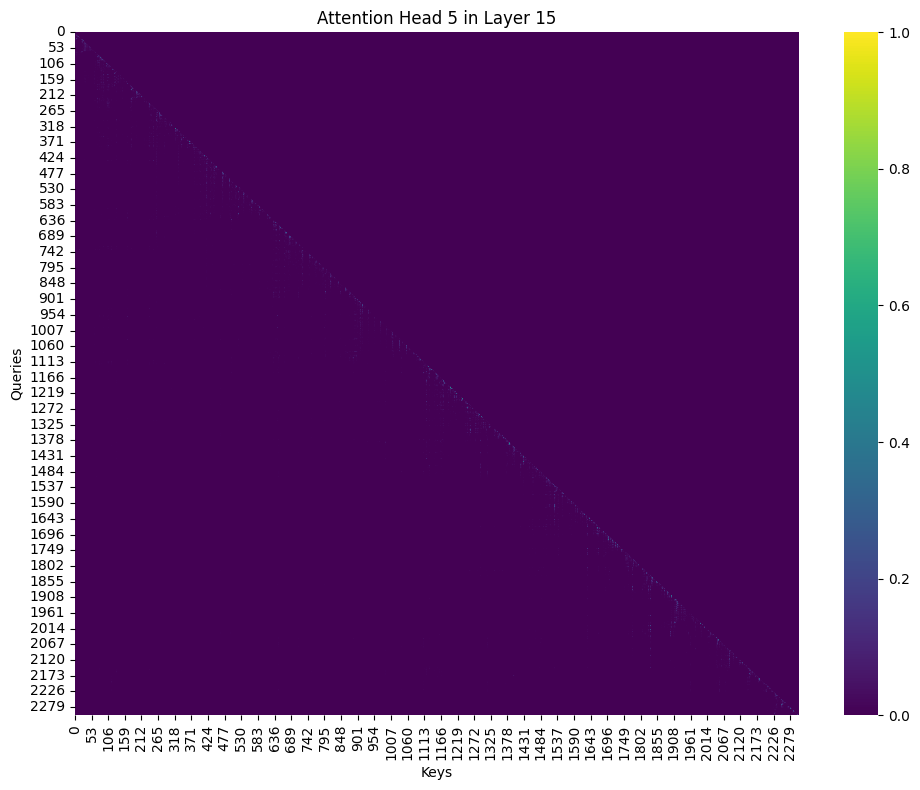

In [14]:
# Define the layer and head you want to visualize
layer_index = 15
head_index = 5
# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    layer_attention = attention_weights[layer_index]
    # Squeeze the batch dimension
    attention_pattern = layer_attention.squeeze(0)
    # Get the specific head's attention matrix and detach from the graph
    head_attention = attention_pattern[head_index].detach().numpy()

    # Create the heatmap visualization
    plt.figure(figsize=(10, 8))
    # sns.heatmap(head_attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
    sns.heatmap(head_attention, cmap='viridis')
    plt.title(f'Attention Head {head_index} in Layer {layer_index}')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Invalid layer index.")

In [15]:
# Define the layer and head you want to visualize
layer_index = 0
head_index = 0

# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    # Squeeze the batch dimension
    layer_attention = attention_weights[layer_index].squeeze(0)
    
    # Get the attention scores for the specific head
    head_attention_scores = layer_attention[head_index]

    # Calculate the average attention score on the diagonal
    # The diagonal represents the attention of each token to itself.
    diagonal_scores = torch.diag(head_attention_scores)
    average_diagonal_score = torch.mean(diagonal_scores)

    # Print the result
    print("-" * 50)
    print(f"Analysis for Layer {layer_index}, Head {head_index}:")
    print(f"Average diagonal attention score: {average_diagonal_score.item():.4f}")
    
    # Define a threshold to determine if it's a "current token attention head"
    # This value is a heuristic and can be adjusted. A high score (e.g., > 0.5)
    # indicates strong self-attention.
    threshold = 0.5
    
    if average_diagonal_score > threshold:
        print(f"This is likely a 'current token attention head' as its average diagonal score is high.")
    else:
        print(f"This is not a 'current token attention head' as its average diagonal score is low.")
    
    print("-" * 50)

else:
    print("Invalid layer index.")

--------------------------------------------------
Analysis for Layer 0, Head 0:
Average diagonal attention score: 0.0248
This is not a 'current token attention head' as its average diagonal score is low.
--------------------------------------------------


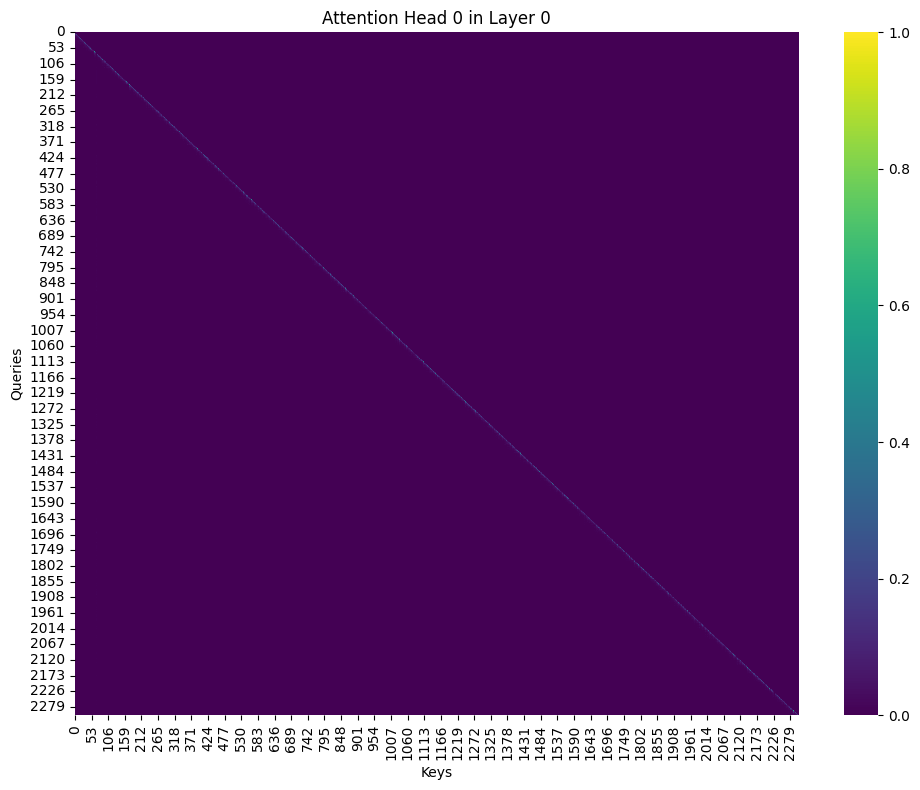

In [16]:
# Define the layer and head you want to visualize
layer_index = 0
head_index = 0
# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    layer_attention = attention_weights[layer_index]
    # Squeeze the batch dimension
    attention_pattern = layer_attention.squeeze(0)
    # Get the specific head's attention matrix and detach from the graph
    head_attention = attention_pattern[head_index].detach().numpy()

    # Create the heatmap visualization
    plt.figure(figsize=(10, 8))
    # sns.heatmap(head_attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
    sns.heatmap(head_attention, cmap='viridis')
    plt.title(f'Attention Head {head_index} in Layer {layer_index}')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Invalid layer index.")

In [18]:
# Define the layer and head you want to visualize
layer_index = 0
head_index = 11

# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    # Squeeze the batch dimension
    layer_attention = attention_weights[layer_index].squeeze(0)
    
    # Get the attention scores for the specific head
    head_attention_scores = layer_attention[head_index]

    # Calculate the average attention score on the diagonal
    # The diagonal represents the attention of each token to itself.
    diagonal_scores = torch.diag(head_attention_scores)
    average_diagonal_score = torch.mean(diagonal_scores)

    # Print the result
    print("-" * 50)
    print(f"Analysis for Layer {layer_index}, Head {head_index}:")
    print(f"Average diagonal attention score: {average_diagonal_score.item():.4f}")
    
    # Define a threshold to determine if it's a "current token attention head"
    # This value is a heuristic and can be adjusted. A high score (e.g., > 0.5)
    # indicates strong self-attention.
    threshold = 0.5
    
    if average_diagonal_score > threshold:
        print(f"This is likely a 'current token attention head' as its average diagonal score is high.")
    else:
        print(f"This is not a 'current token attention head' as its average diagonal score is low.")
    
    print("-" * 50)

else:
    print("Invalid layer index.")

--------------------------------------------------
Analysis for Layer 0, Head 11:
Average diagonal attention score: 0.0200
This is not a 'current token attention head' as its average diagonal score is low.
--------------------------------------------------


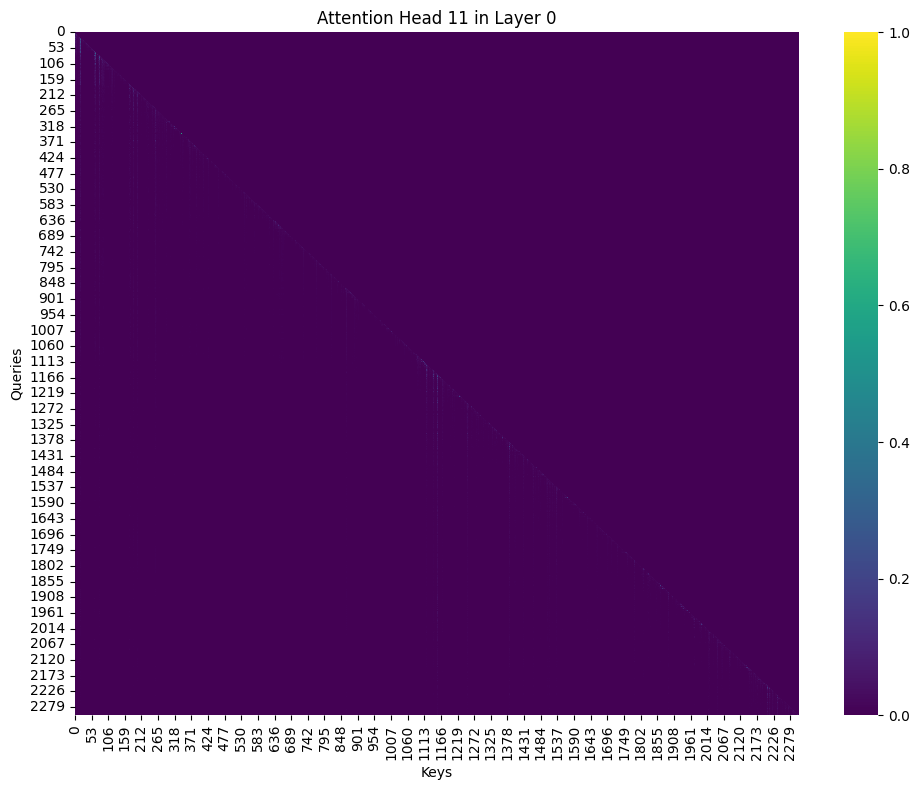

In [17]:
# Define the layer and head you want to visualize
layer_index = 0
head_index = 11
# Extract the attention pattern for the specified layer and head
if layer_index < len(attention_weights):
    layer_attention = attention_weights[layer_index]
    # Squeeze the batch dimension
    attention_pattern = layer_attention.squeeze(0)
    # Get the specific head's attention matrix and detach from the graph
    head_attention = attention_pattern[head_index].detach().numpy()

    # Create the heatmap visualization
    plt.figure(figsize=(10, 8))
    # sns.heatmap(head_attention, xticklabels=tokens, yticklabels=tokens, cmap='viridis')
    sns.heatmap(head_attention, cmap='viridis')
    plt.title(f'Attention Head {head_index} in Layer {layer_index}')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Invalid layer index.")